70781.43124907304


/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Data 1:
Percentage EV's van Auto's: 0.9072164948453608
Hoeveelheid totale Subsidie: 1682828.969958423
Percentage late majority met EV: 0.9128205128205128
Percentage laggards met EV: 0.9148936170212766

Data 2:
Percentage EV's van Auto's: 0.9477234401349073
Hoeveelheid totale Subsidie: 661200.0
Percentage late majority met EV: 0.9336734693877551
Percentage laggards met EV: 0.9587628865979382

Data 3:
Percentage EV's van Auto's: 0.9392361111111112
Hoeveelheid totale Subsidie: 914633.1481370159
Percentage late majority met EV: 0.9489795918367347
Percentage laggards met EV: 0.9222222222222223

Data 1:
Percentage EV's van Auto's: 0.9218472468916519
Hoeveelheid totale Subsidie: 1662658.3402221908
Percentage late majority met EV: 0.921875
Percentage laggards met EV: 0.9883720930232558

Data 2:
Percentage EV's van Auto's: 0.9298831385642737
Hoeveelheid totale Subsidie: 688200.0
Percentage late majority met EV: 0.9458128078817734
Percentage laggards met EV: 0.9130434782608695

Data 3:
Percentag

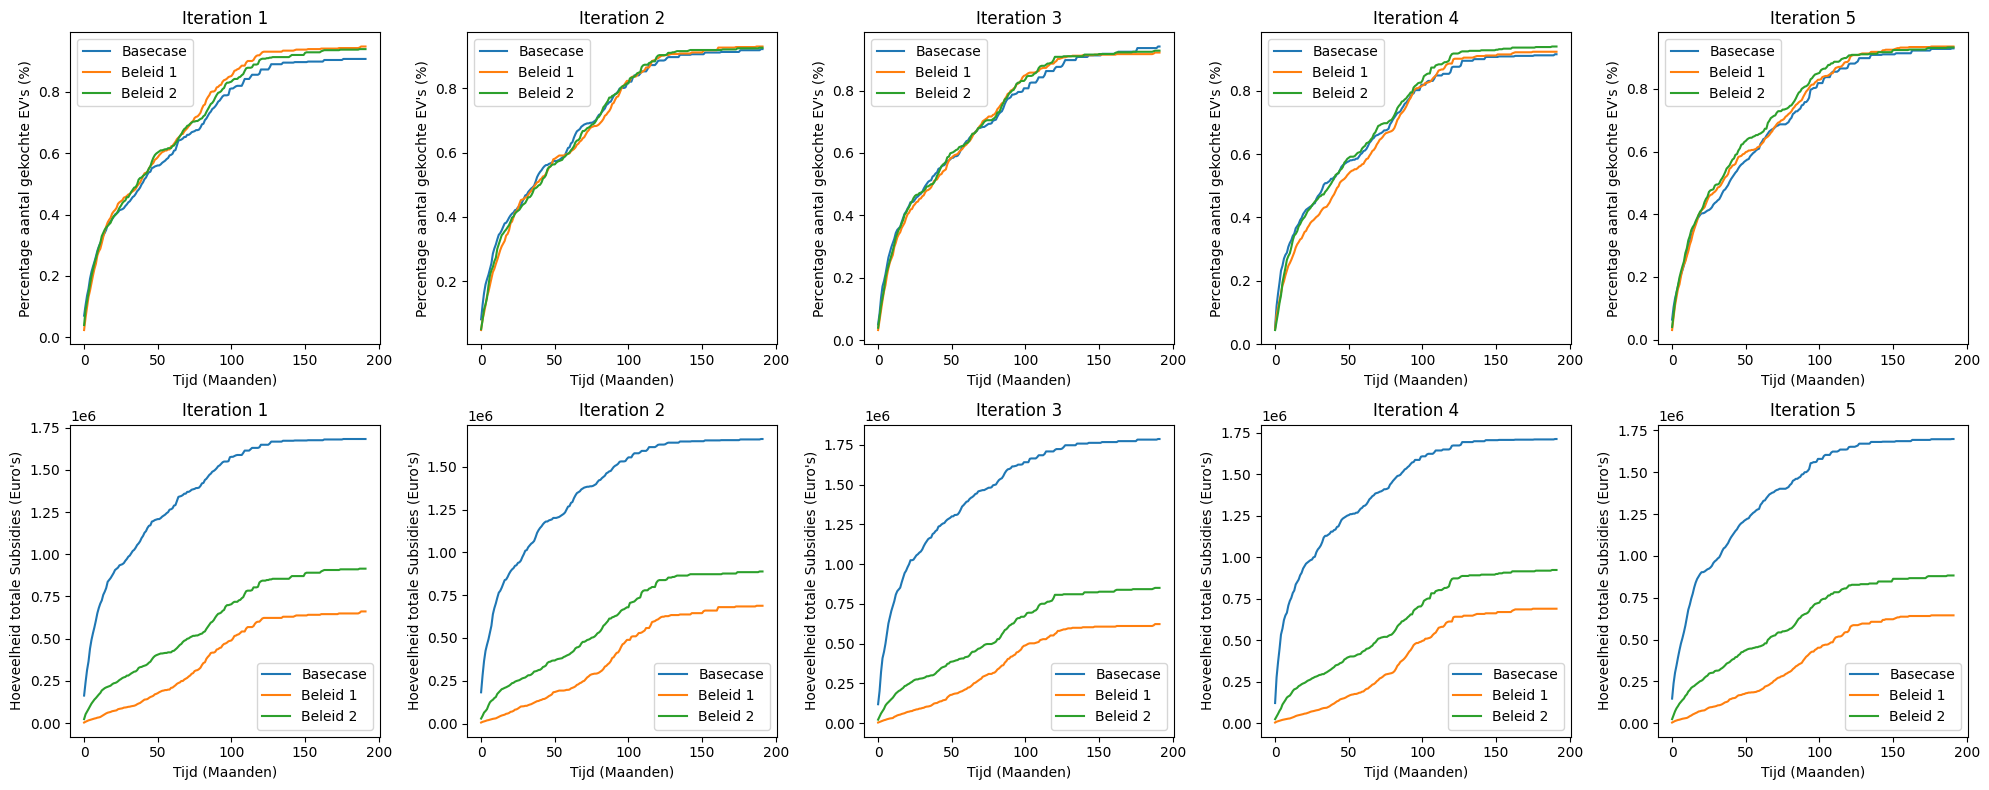

In [1]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

scenario1 = [32000, 396000] # versnelde economische doorbraak
scenario2 = [40000, 33000] # basis scenario
scenario3 = [48000, 26400] # Innovatie crisis

aantal_iteraties = 5

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen


avg_percentage_ev = np.zeros((aantal_iteraties))



for iteratie in range(aantal_iteraties):
    ev = scenario1[0]
    fba = scenario1[1]

    model1 = SubsidieModel(ev, fba)
    model2 = SubsidieModel2(ev, fba)
    model3 = SubsidieModel3(ev, fba)
    for j in range(192):
        model1.step()
        model2.step()
        model3.step()

        
    base_case1 = model1.datacollector.get_model_vars_dataframe()
    beleid1_1 = model2.datacollector.get_model_vars_dataframe()
    beleid2_1 = model3.datacollector.get_model_vars_dataframe()
    
    x = range(len(base_case1))

    datasets = [base_case1, beleid1_1, beleid2_1]
    labels = ['Data 1', 'Data 2', 'Data 3']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    axs[0, iteratie].plot(x, base_case1["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_1["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_1["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EV\'s (%)')  
    axs[0, iteratie].legend() 

    axs[1, iteratie].plot(x, base_case1["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_1["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_1["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')  
    axs[1, iteratie].legend() 

plt.tight_layout()
plt.show()

Data 4:
Percentage EV's van Auto's: 0.9101899827288429
Hoeveelheid totale Subsidie: 1392262.8665266912
Percentage late majority met EV: 0.8870967741935484
Percentage laggards met EV: 0.9230769230769231

Data 5:
Percentage EV's van Auto's: 0.8807829181494662
Hoeveelheid totale Subsidie: 973000.0
Percentage late majority met EV: 0.8774509803921569
Percentage laggards met EV: 0.8735632183908046

Data 6:
Percentage EV's van Auto's: 0.8841059602649006
Hoeveelheid totale Subsidie: 1274067.178058856
Percentage late majority met EV: 0.8855721393034826
Percentage laggards met EV: 0.900990099009901

Data 4:
Percentage EV's van Auto's: 0.8738898756660746
Hoeveelheid totale Subsidie: 1354556.2116024885
Percentage late majority met EV: 0.8461538461538461
Percentage laggards met EV: 0.8969072164948454

Data 5:
Percentage EV's van Auto's: 0.8781302170283807
Hoeveelheid totale Subsidie: 1049200.0
Percentage late majority met EV: 0.8809523809523809
Percentage laggards met EV: 0.8811881188118812

Data 6

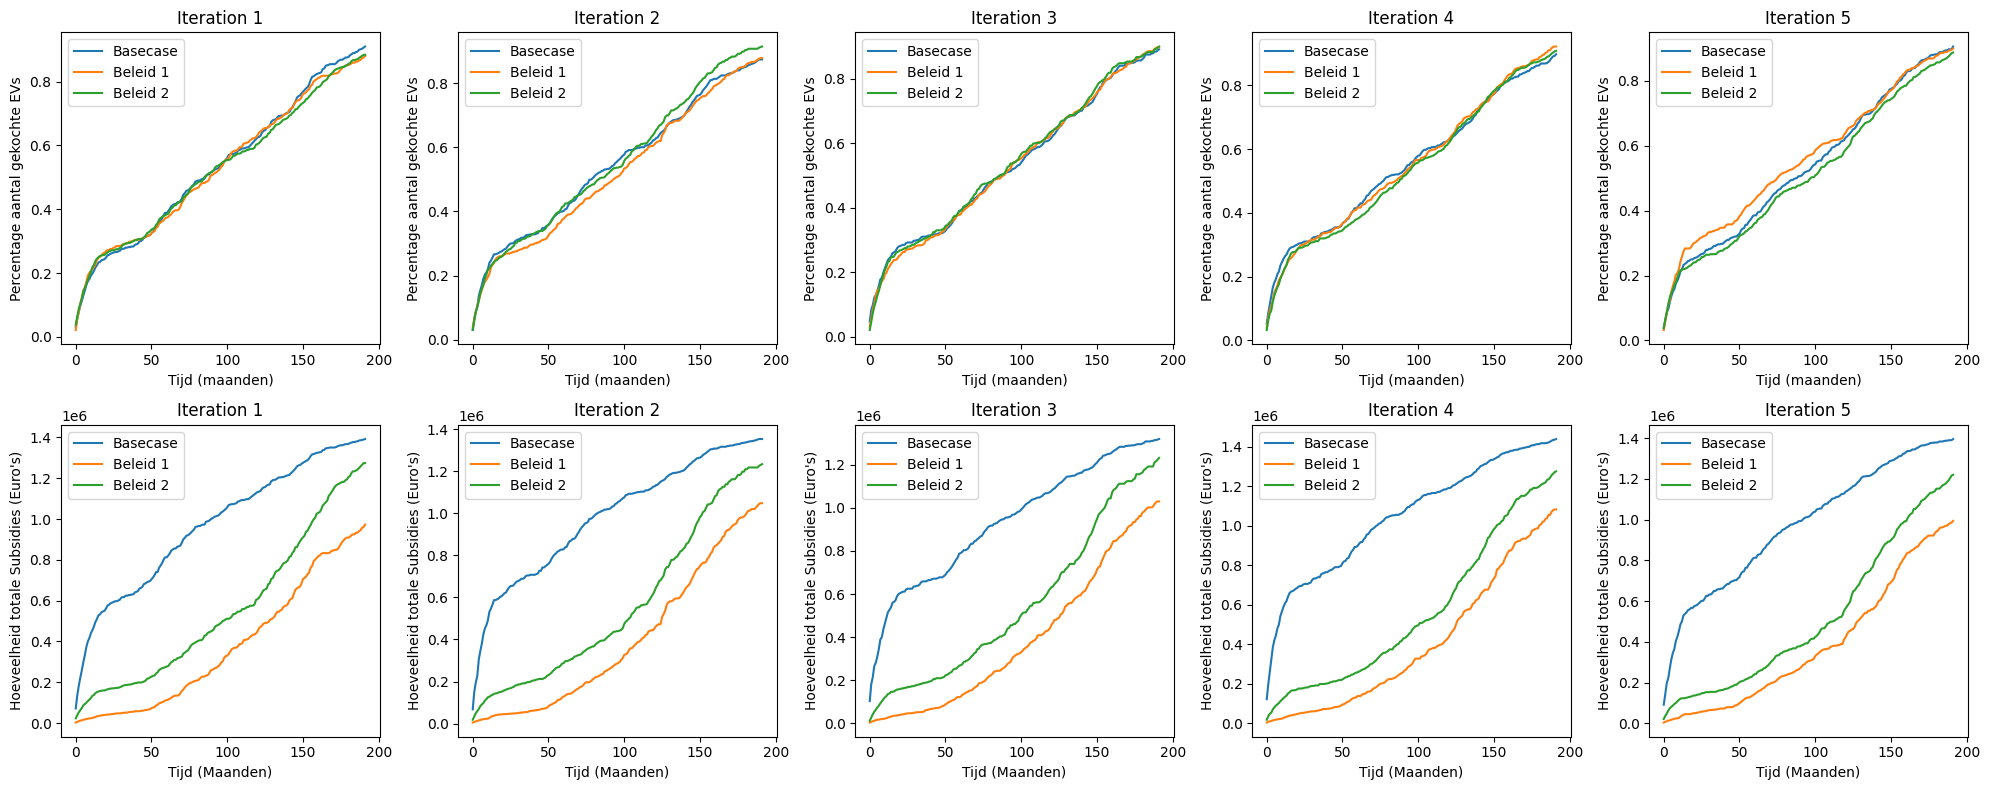

In [2]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen


avg_percentage_ev2 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario2[0]
    fba = scenario2[1]

    model4 = SubsidieModel(ev, fba)
    model5 = SubsidieModel2(ev, fba)
    model6 = SubsidieModel3(ev, fba)
    for j in range(192):
        model4.step()
        model5.step()
        model6.step()

        
    basecase_0 = model4.datacollector.get_model_vars_dataframe()
    beleid1_0 = model5.datacollector.get_model_vars_dataframe()
    beleid2_0 = model6.datacollector.get_model_vars_dataframe()
    
    x = range(len(basecase_0 ))

    datasets = [basecase_0 , beleid1_0 , beleid2_0]

    labels = ['Data 4', 'Data 5', 'Data 6']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    axs[0, iteratie].plot(x, basecase_0["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_0["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_0["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EVs')  
    axs[0, iteratie].legend()

    axs[1, iteratie].plot(x, basecase_0["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_0["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_0["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')
    axs[1, iteratie].legend()   

plt.tight_layout()
plt.show()

Data 7:
Percentage EV's van Auto's: 0.8133802816901409
Hoeveelheid totale Subsidie: 1285278.4254119343
Percentage late majority met EV: 0.8167539267015707
Percentage laggards met EV: 0.7303370786516854

Data 8:
Percentage EV's van Auto's: 0.8353765323992994
Hoeveelheid totale Subsidie: 866300.0
Percentage late majority met EV: 0.8256410256410256
Percentage laggards met EV: 0.8333333333333334

Data 9:
Percentage EV's van Auto's: 0.8235294117647058
Hoeveelheid totale Subsidie: 1027743.8334300326
Percentage late majority met EV: 0.8108108108108109
Percentage laggards met EV: 0.8369565217391305

Data 7:
Percentage EV's van Auto's: 0.8222996515679443
Hoeveelheid totale Subsidie: 1251681.9453093677
Percentage late majority met EV: 0.7894736842105263
Percentage laggards met EV: 0.7878787878787878

Data 8:
Percentage EV's van Auto's: 0.7982142857142858
Hoeveelheid totale Subsidie: 816300.0
Percentage late majority met EV: 0.8218390804597702
Percentage laggards met EV: 0.77

Data 9:
Percentage 

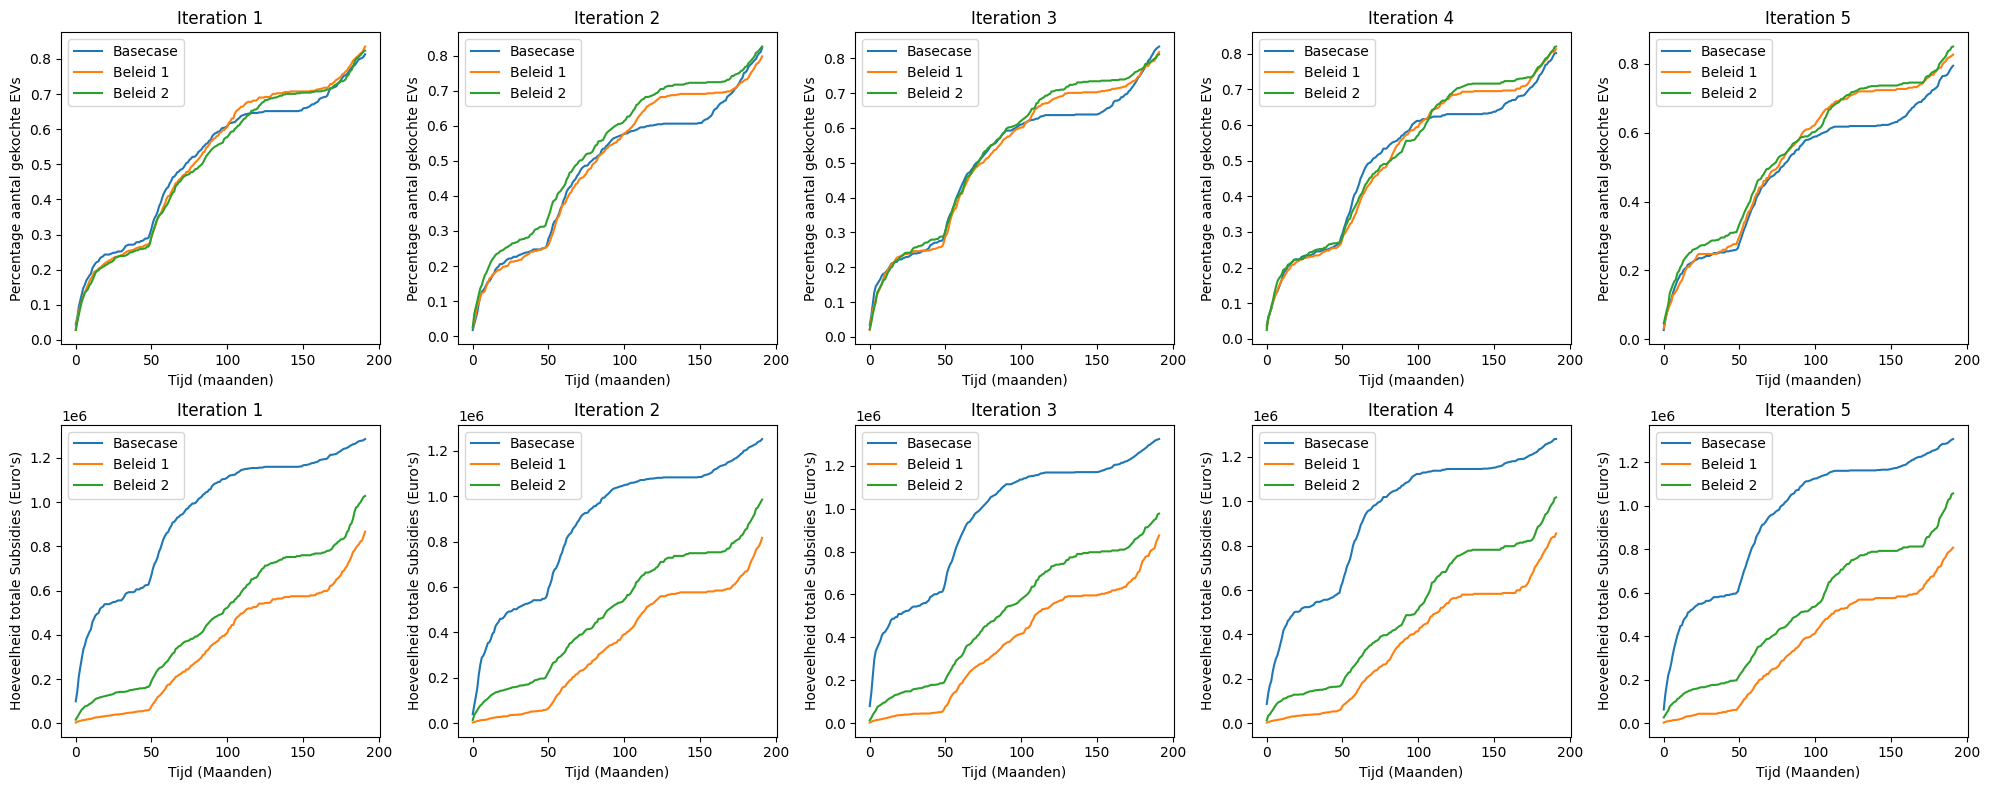

In [3]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 1 rij, 5 kolommen

avg_percentage_ev3 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario3[0]
    fba = scenario3[1]

    model7 = SubsidieModel(ev, fba)
    model8 = SubsidieModel2(ev, fba)
    model9 = SubsidieModel3(ev, fba)
    for j in range(192):
        model7.step()
        model8.step()
        model9.step()

        
    basecase_2 = model7.datacollector.get_model_vars_dataframe()
    beleid1_2 = model8.datacollector.get_model_vars_dataframe()
    beleid2_2 = model9.datacollector.get_model_vars_dataframe()
    
    x = range(len(basecase_2))

    datasets = [basecase_2, beleid1_2, beleid2_2]
    labels = ['Data 7', 'Data 8', 'Data 9']

    for label, dataset in zip(labels, datasets):
        last_row = dataset.iloc[-1]
        percentage_ev = last_row["Percentage EV's van Auto's"]
        hoeveelheid_sub = last_row["Hoeveelheid totale Subsidie"]
        percentage_late_majority_ev = last_row["Percentage late majority met EV"]
        percentage_laggards_ev = last_row["Percentage laggards met EV"]
    
        print(label + ':')
        print(f"Percentage EV's van Auto's: {percentage_ev}")
        print(f"Hoeveelheid totale Subsidie: {hoeveelheid_sub}")
        print(f"Percentage late majority met EV: {percentage_late_majority_ev}")
        print(f"Percentage laggards met EV: {percentage_laggards_ev}")
        print()


    
    axs[0, iteratie].plot(x, basecase_2["Percentage EV's van Auto's"], label='Basecase')
    axs[0, iteratie].plot(x, beleid1_2["Percentage EV's van Auto's"], label='Beleid 1')
    axs[0, iteratie].plot(x, beleid2_2["Percentage EV's van Auto's"], label='Beleid 2')

    axs[0, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[0, iteratie].set_xlabel('Tijd (maanden)')  
    axs[0, iteratie].set_ylabel('Percentage aantal gekochte EVs')  
    axs[0, iteratie].legend() 

    axs[1, iteratie].plot(x, basecase_2["Hoeveelheid totale Subsidie"], label='Basecase')
    axs[1, iteratie].plot(x, beleid1_2["Hoeveelheid totale Subsidie"], label='Beleid 1')
    axs[1, iteratie].plot(x, beleid2_2["Hoeveelheid totale Subsidie"], label='Beleid 2')

    axs[1, iteratie].set_title(f'Iteration {iteratie+1}')
    axs[1, iteratie].set_xlabel('Tijd (Maanden)')  
    axs[1, iteratie].set_ylabel('Hoeveelheid totale Subsidies (Euro\'s)')  
    axs[1, iteratie].legend()

plt.tight_layout()
plt.show()